# **Classification du churn dans une entreprise de services numériques**

L'objectif est de prédire la résiliation des clients d'une entreprise de services téléphoniques et Internet à l'aide d'un modèle de Machine Learning.

- `CustomerID` : Un identifiant unique pour chaque client.
- `Zip Code` : Le code postal de la résidence principale du client.
- `Lat Long` : Un tuple représentant les coordonnées GPS du Zip Code.
- `Gender` : Le genre du client : Masculin, Féminin.
- `Senior Citizen` : Indique si le client a 65 ans ou plus : Oui, Non.
- `Partner` : Indique si le client a un partenaire : Oui, Non.
- `Dependents` : Indique si le client vit avec des personnes à charge : Oui, Non. Les personnes à charge peuvent être des enfants, parents, grands-parents, etc.
- `Tenure Months` : Indique le nombre total de mois que le client a passé avec l'entreprise à la fin du trimestre d'étude.
- `Phone Service` : Indique si le client est abonné à un service de téléphone à domicile avec l'entreprise : Oui, Non.
- `Multiple Lines` : Indique si le client est abonné à plusieurs lignes téléphoniques avec l'entreprise : Oui, Non.
- `Internet Service` : Indique si le client est abonné à un service Internet avec l'entreprise : Non, DSL, Fibre optique.
- `Online Security` : Indique si le client est abonné à un service supplémentaire de sécurité en ligne fourni par l'entreprise : Oui, Non.
- `Online Backup` : Indique si le client est abonné à un service supplémentaire de sauvegarde en ligne fourni par l'entreprise : Oui, Non.
- `Device Protection` : Indique si le client est abonné à un plan de protection supplémentaire pour son équipement Internet fourni par l'entreprise : Oui, Non.
- `Tech Support` : Indique si le client est abonné à un plan de support technique supplémentaire avec des temps d'attente réduits : Oui, Non.
- `Streaming TV` : Indique si le client utilise son service Internet pour diffuser des programmes télévisés via un fournisseur tiers : Oui, Non. L'entreprise ne facture pas de frais supplémentaires pour ce service.
- `Streaming Movies` : Indique si le client utilise son service Internet pour diffuser des films via un fournisseur tiers : Oui, Non. L'entreprise ne facture pas de frais supplémentaires pour ce service.
- `Contract` : Indique le type de contrat actuel du client : Mois par Mois, Un an, Deux ans.
- `Paperless Billing` : Indique si le client a opté pour la facturation sans papier : Oui, Non.
- `Payment Method` : Indique comment le client paye sa facture : Prélèvement bancaire, Carte de crédit, Chèque envoyé par courrier, Chèque automatique.
- `Monthly Charges` : Indique le montant total actuel mensuel des services de l'entreprise pour le client.
- `Total Charges` : Indique les frais totaux du client, calculés jusqu'à la fin du trimestre spécifié ci-dessus.
- `CLTV` : Valeur vie client (Customer Lifetime Value). Une CLTV prédite est calculée à l'aide de formules d'entreprise et de données existantes. Plus la valeur est élevée, plus le client est précieux. Les clients de grande valeur doivent être surveillés pour éviter leur départ.
- `Churn Value` : 1 = le client a quitté l'entreprise ce trimestre. 0 = le client est resté avec l'entreprise. Ceci est la variable à prédire.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

## **0. Vision d'ensemble**

In [2]:
df = pd.read_csv("DatasetChurn.csv")
df.head()

,CustomerID,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,9638-JIQYA,95303,"37.4695, -120.672724",Male,No,No,No,2,No,No phone service,...,No,No,No,Month-to-month,Yes,Credit card (automatic),24.90,49.70,0,4033
1,2892-GESUL,92675,"33.521447, -117.602555",Female,No,Yes,Yes,18,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,0,2269
2,3808-HFKDE,91801,"34.090925, -118.128164",Female,No,No,No,20,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,44.35,927.15,0,3460
3,0278-YXOOG,90301,"33.956445, -118.358634",Male,No,No,No,5,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,1,2604
4,4869-EPIUS,94901,"37.972662, -122.491452",Male,No,Yes,No,56,Yes,No,...,No,No,Yes,One year,Yes,Electronic check,80.90,4557.50,0,5344


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6174 non-null   object 
 1   Zip Code           6174 non-null   int64  
 2   Lat Long           6174 non-null   object 
 3   Gender             6174 non-null   object 
 4   Senior Citizen     6174 non-null   object 
 5   Partner            6165 non-null   object 
 6   Dependents         6174 non-null   object 
 7   Tenure Months      6174 non-null   int64  
 8   Phone Service      6174 non-null   object 
 9   Multiple Lines     6174 non-null   object 
 10  Internet Service   6174 non-null   object 
 11  Online Security    6174 non-null   object 
 12  Online Backup      6174 non-null   object 
 13  Device Protection  6174 non-null   object 
 14  Tech Support       6174 non-null   object 
 15  Streaming TV       6174 non-null   object 
 16  Streaming Movies   6158 

In [4]:
df.nunique()

CustomerID           6174
Zip Code             1652
Lat Long             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1523
Total Charges        5827
Churn Value             2
CLTV                 3243
dtype: int64

- Les colonnes `Zip Code` et `Lat Long` ont le même nombre de valeurs uniques.
- Y'aurait-il une correspondance entre ces deux colonnes ?

In [5]:
# Confirmons l'association entre un Zip Code et des coordonnées géographiques
(
    df.groupby("Zip Code")  # pour chaque Zip Code
    ["Lat Long"].agg(set)   # on récupère l'ensemble des coordonnées géographiques
    .apply(len)             # on compte le nombre d'éléments récupérés par ligne
    .unique()               # on récupère les valeurs uniques des précédents comptages
)

array([1])

- Le résultat ci-dessus confirme l'association entre un Zip Code et des coordonnées géographiques, nous n'allons conserver qu'une seule de ces colonnes.
- Il serait plus intéressant de conserver la colonne `Lat Long` pour mieux détecter les tendances liés au positionnement géographique.
- Cette colonne sera ensuite splitée en `Lat` et `Long` pour une meilleure exploitation.

In [6]:
df.drop(columns=["Zip Code"], inplace=True)
df["Lat"] = df["Lat Long"].str.split(", ").str[0].astype(float)
df["Long"] = df["Lat Long"].str.split(", ").str[1].astype(float)

- Observons les valeurs manquantes par colonnes

In [7]:
df.isna().sum()

CustomerID             0
Lat Long               0
Gender                 0
Senior Citizen         0
Partner                9
Dependents             0
Tenure Months          0
Phone Service          0
Multiple Lines         0
Internet Service       0
Online Security        0
Online Backup          0
Device Protection      0
Tech Support           0
Streaming TV           0
Streaming Movies      16
Contract               0
Paperless Billing      0
Payment Method         0
Monthly Charges      127
Total Charges         11
Churn Value            0
CLTV                   0
Lat                    0
Long                   0
dtype: int64

In [8]:
n_na = df.isna().any(axis=1).sum()
print(f"Nombre de lignes ayant au moins une valeur manquante : {n_na} ({n_na / df.shape[0] * 100:.2f}%)")

Nombre de lignes ayant au moins une valeur manquante : 163 (2.64%)


- Nous supprimons les lignes concernées, car leur proportion est relativement faible.

In [9]:
df.dropna(inplace=True)

- Maintenant nous catégorisons les variables afin de faciliter l'analyse.

In [10]:
coords = ["Lat", "Long"]
disc = ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines", "Internet Service", "Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies", "Contract", "Paperless Billing", "Payment Method"]
cont = ["Monthly Charges", "Total Charges", "Tenure Months", "CLTV"]
target = "Churn Value"

## **1. Analyse des données**

In [11]:
df[target].value_counts(normalize=True).round(2)

Churn Value
0    0.84
1    0.16
Name: proportion, dtype: float64

- On constate une répartition inégale de la variable cible : 16% des clients résilient leur contrat.

### **1.0. Fonctions utilitaires (visualisations)**

In [12]:
def plot_disc_variables(df, cols, n_rows=2, n_cols=8, **kwargs):
    """Représente la distribution des variables discrètes."""
    
    _, axes = plt.subplots(n_rows, n_cols, figsize=kwargs.get("figsize", (24, 6)))
    
    if len(cols) > 1:
        axes = axes.flatten()
    
    for i, col in enumerate(cols):
        ax = axes[i] if len(cols) > 1 else axes

        sns.countplot(data=df, x=col, ax=ax)
        
        # Ajout des pourcentages sur les barres
        n = df[col].count()
        for p in ax.patches:
            ax.text(
                p.get_x() + p.get_width() / 2,
                p.get_y() + p.get_height() / 2,
                f"{p.get_height() / n:.0%}",
                ha="center", va="center",
                c="w", weight="bold",
            )
            
            ax.set_xlabel(col, weight="bold")
            ax.set_xticks(ax.get_xticks())
            
            xticklabels = ["\n".join(label.get_text().split()) for label in ax.get_xticklabels()]
            ax.set_xticklabels(xticklabels, rotation=0)
            
            ax.set_yticks([])
            ax.set_ylabel("")

    title = kwargs.get("fig_title", "Distribution des variables discrètes")
    size = kwargs.get("fig_title_font_size", 16)
    
    plt.suptitle(title, size=size, weight="bold")
    plt.tight_layout()
    plt.show()

In [13]:
def plot_disc_vs_target(df, cols, segment="All", target="Churn Value", **kwargs):
    """Représente le taux de churn selon les différentes modalités des variables discrètes."""
    
    _, axes = plt.subplots(1, len(cols), figsize=kwargs.get("figsize", (28, 4)))
    
    for i, col in enumerate(cols):
        prop_df = pd.crosstab(df[col], df[target])
        prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)
        
        ax = axes[i] if len(cols) > 1 else axes
        
        # Couleurs des classes 0 (vert) et 1 (rouge)
        colors_01 = kwargs.get("colors_01", sns.color_palette()[1:3])
        
        bar = prop_df.plot(kind="bar", stacked=True, legend=False, color=colors_01, alpha=0.8, ax=ax)
        
        # Ajout des pourcentages sur les barres
        for i, p in enumerate(bar.patches):
            if i < len(bar.patches) / 2:
                bar.text(
                    p.get_x() + p.get_width() / 2,
                    p.get_y() + p.get_height() / 2,
                    f"{p.get_height():.0%}",
                    ha="center", va="center",
                    c="w", weight="bold",
                )
                
        bar.set_xlabel(col, weight="bold")
        bar.set_xticks(bar.get_xticks())
        
        xticklabels = ["\n".join(label.get_text().split()) for label in ax.get_xticklabels()]
        bar.set_xticklabels(xticklabels, rotation=0)
        
        bar.set_yticks([])
        bar.set_ylabel("")

    ax = axes[0] if len(cols) > 1 else axes
    ax.legend(title=target, bbox_to_anchor=(0, 1))
    
    size = kwargs.get("fig_title_font_size", 16)
    
    plt.suptitle(f"Taux de churn selon les variables discrètes, Segment = {segment}", size=size, weight="bold")
    plt.tight_layout()
    plt.show()

In [14]:
def plot_cont_vs_cont(df, cols, segment="All", target="Churn Value", **kwargs):
    """Représente les relations entre plusieurs variables continues."""
    
    # Couleurs des classes 0 (vert) et 1 (rouge)
    colors_01 = kwargs.get("colors_01", sns.color_palette()[1:3])
    
    g = sns.PairGrid(df, hue=target, vars=cols, palette=colors_01, corner=True, diag_sharey=False)
    g.map_diag(sns.histplot, bins=100)
    g.map_lower(sns.scatterplot, s=10, alpha=0.8)
    g.add_legend(bbox_to_anchor=(0.92, 0.95))
    
    plt.suptitle(f"Relations entre les variables continues, Segment = {segment}", y=1.01, size=14, weight="bold")
    plt.show()

In [15]:
def plot_cont_vs_target(df, cols, target_value, segment="All", target="Churn Value", **kwargs):
    """Représente la distribution des variables continues selon une valeur fixée de la variable cible."""
    
    _, axes = plt.subplots(1, len(cols), figsize=kwargs.get("figsize", (18, 3)))

    # Couleurs des classes 0 (vert : green) et 1 (rouge : reg)
    color_g, color_r = kwargs.get("colors_01", sns.color_palette()[1:3])
    color = color_g if (target_value == 0) else color_r
    
    for i, col in enumerate(cols):
        axes[i].hist(df.loc[df[target] == target_value, col], bins=100, color=color, alpha=0.8, label=target_value)
        axes[i].set_title(col)

    plt.suptitle(f"Distribution des variables continues\nSegment = {segment}, Churn Value = {target_value}", y=0.95, size=12, weight="bold")
    plt.tight_layout()
    plt.show()

### **1.1. Variables discrètes**

In [16]:
print(f"{len(disc)} variables discrètes : {disc}")

16 variables discrètes : ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


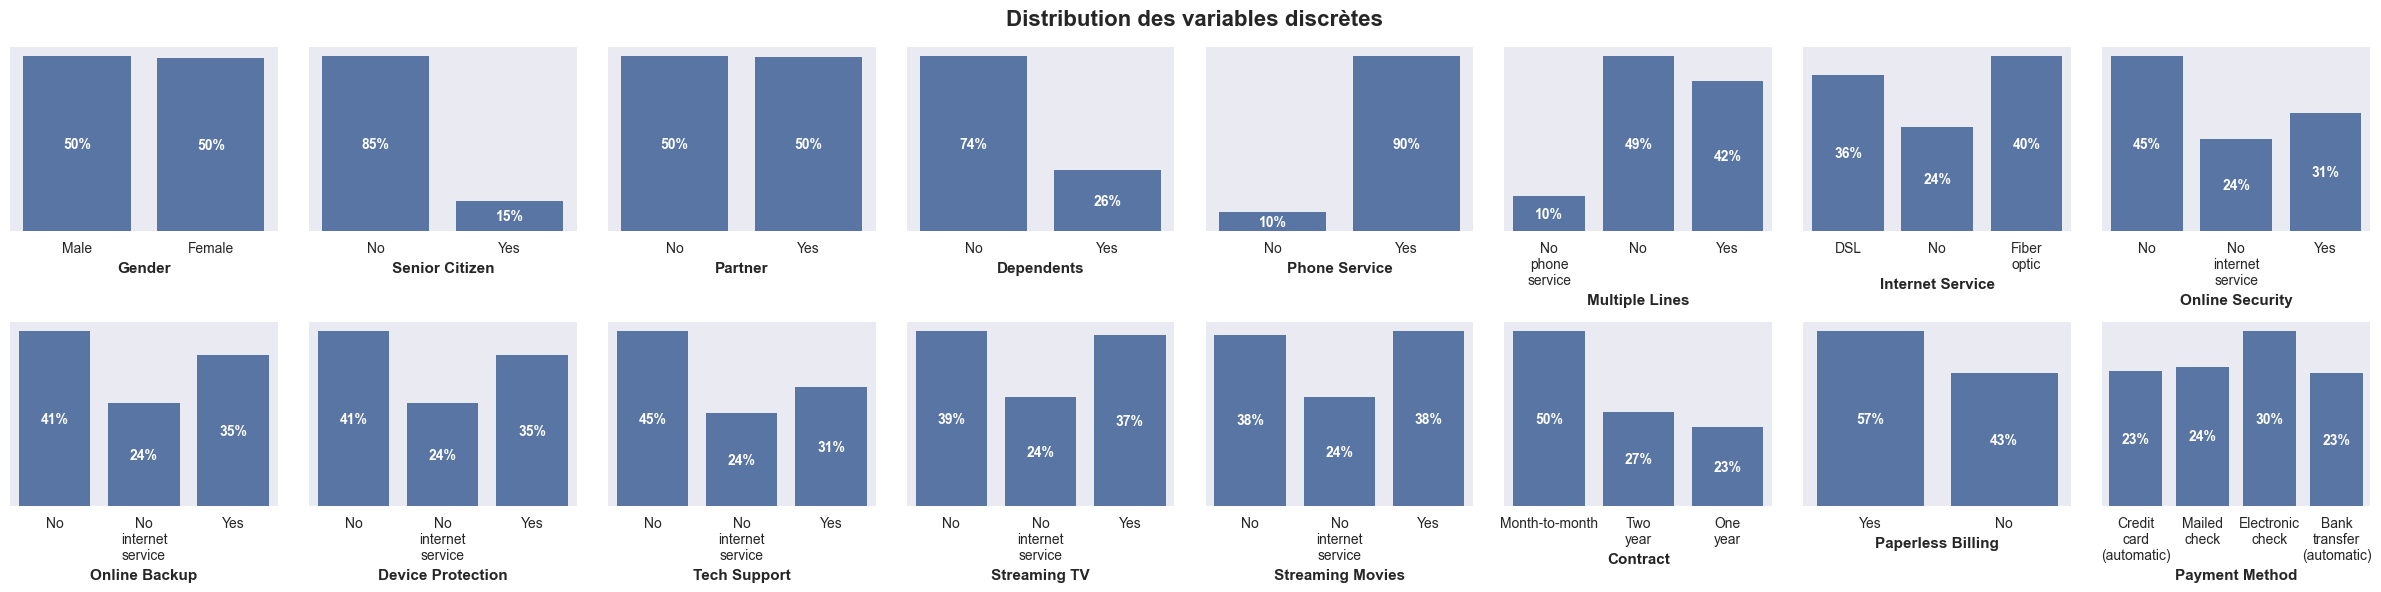

In [17]:
plot_disc_variables(df=df, cols=disc)

- Les répartitions hommes/femmes et avec/sans partenaire sont très équilibrées, tandis que les répartitions des personnes agées et des personnes ayant souscrit à un service de téléphone mobile sont déséquilibrées en faveur respecivement des personnes de moins de 65 ans (85%), et des personnes ayant souscrit à un service de téléphone mobile (90%).
- On peut également noter que le quart des clients ne vit pas avec des personnes à charge et la moitié renouvelle mensuellement son abonnement, tandis que l'autre moitié est presque équitablement répartie entre les personnes ayant souscrit à un abonnement annuel et les personnes ayant souscrit à un abonnement sur deux ans.
- La variable `Multiple Lines` est une version détaillée de `Phone Service`, on mesurera l'impact de la suppression de cette dernière de notre jeu de données.
- Aussi, nous remarquons que près du quart des clients de l'échantillon n'est pas abonné à un service Internet. En séparant les données suivant cette variable, l'on pourra analyser le segment "Sans Internet" en se passant des 6 variables qui donnent davantage de précisions sur les services : `Online Security`, `Online Backup`, `Device Protection`, `Tech Support`, `Streaming TV` et `Streaming Movies`.

#### **1.1.1. Séparation avec/sans Internet**

In [18]:
df_internet = df[df["Internet Service"] != "No"].copy()
df_no_internet = df[df["Internet Service"] == "No"].copy()

- Pour juger de la pertinence de ce split, nous évaluons le lien entre les variables discrètes et la cible.

In [19]:
from scipy.stats import chi2_contingency

tmp_dfs = {
    "Avec Internet": df_internet,
    "Sans Internet": df_no_internet,
}

# Test d'indépendance du chi-2
disc_no_internet = ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines", "Contract", "Paperless Billing", "Payment Method"]

for col in disc_no_internet:
    print(f" {col} ".center(25, "-"))
    for df_name, tmp_df in tmp_dfs.items():
        pvalue = chi2_contingency(pd.crosstab(tmp_df[col], tmp_df[target])).pvalue
        lien = " *" if pvalue < 0.05 else ""
        print(f"- {df_name}".ljust(15) + f"  {pvalue:.4f}" + lien)
    print()

--------- Gender --------
- Avec Internet  0.1254
- Sans Internet  0.8092

----- Senior Citizen ----
- Avec Internet  0.0000 *
- Sans Internet  0.7922

-------- Partner --------
- Avec Internet  0.0000 *
- Sans Internet  0.0022 *

------- Dependents ------
- Avec Internet  0.0000 *
- Sans Internet  0.0009 *

----- Phone Service -----
- Avec Internet  0.0008 *
- Sans Internet  1.0000

----- Multiple Lines ----
- Avec Internet  0.0024 *
- Sans Internet  0.0008 *

-------- Contract -------
- Avec Internet  0.0000 *
- Sans Internet  0.0000 *

--- Paperless Billing ---
- Avec Internet  0.0000 *
- Sans Internet  0.2546

----- Payment Method ----
- Avec Internet  0.0000 *
- Sans Internet  0.0022 *



- On observe qu'effectivement, selon que les clients aient souscrit ou non à un service Internet, le soutien à l'hypothèse d'indépendance entre les variables varie de manière significative. Les tests ci-dessus suggèrent, avec un seuil fixé à 2%, des liens de dépendance suivants avec la variable cible :

| Colonnes | Avec Internet | Sans Internet |
|-|:-:|:-:|
| Gender            |   |   |
| Senior Citizen    | x |   |
| Partner           | x | x |
| Dependents        | x | x |
| Phone Service     | x |RAS|
| Multiple Lines    | x | x |
| Contract          | x | x |
| Paperless Billing | x |   |
| Payment Method    | x | x |

- **RAS → Aucune interprétation** : Les clients n'ayant souscrit à aucun service Internet sont forcément des abonnés mobile, on n'a donc qu'une seule modalité dans cette classe (Yes).

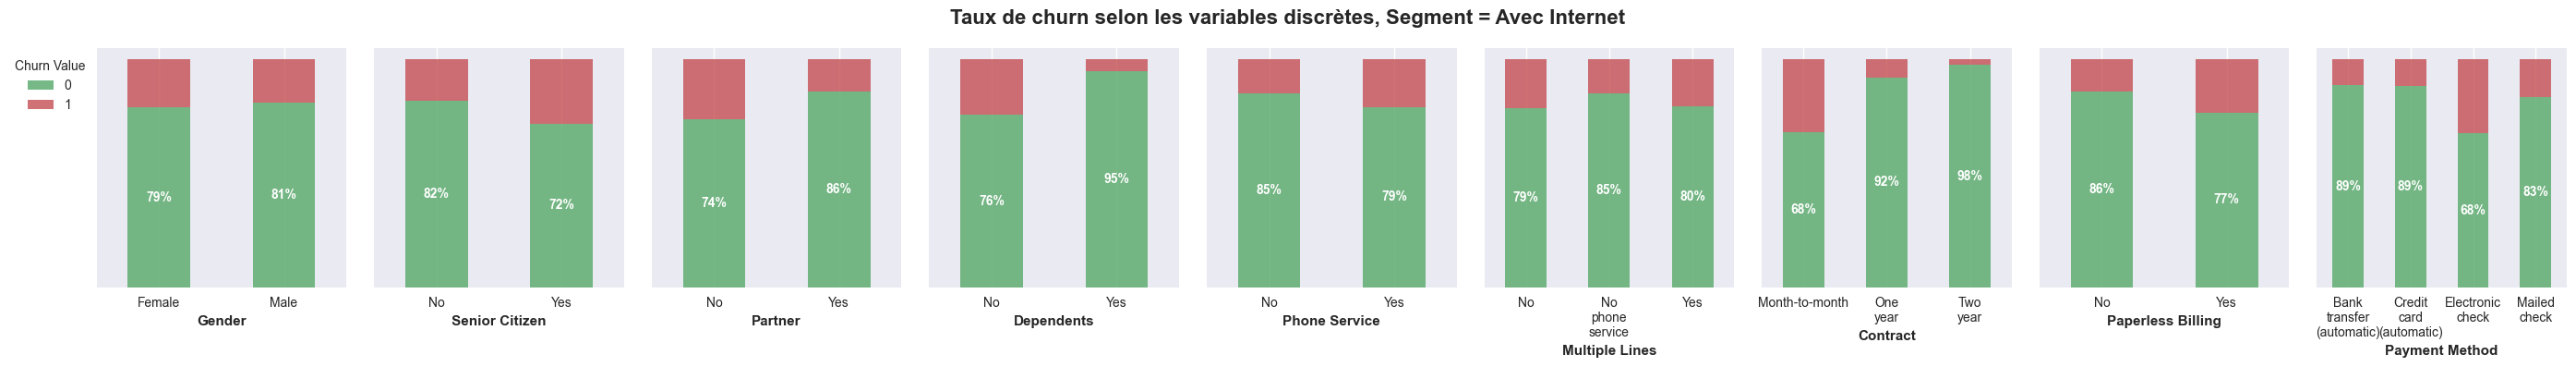

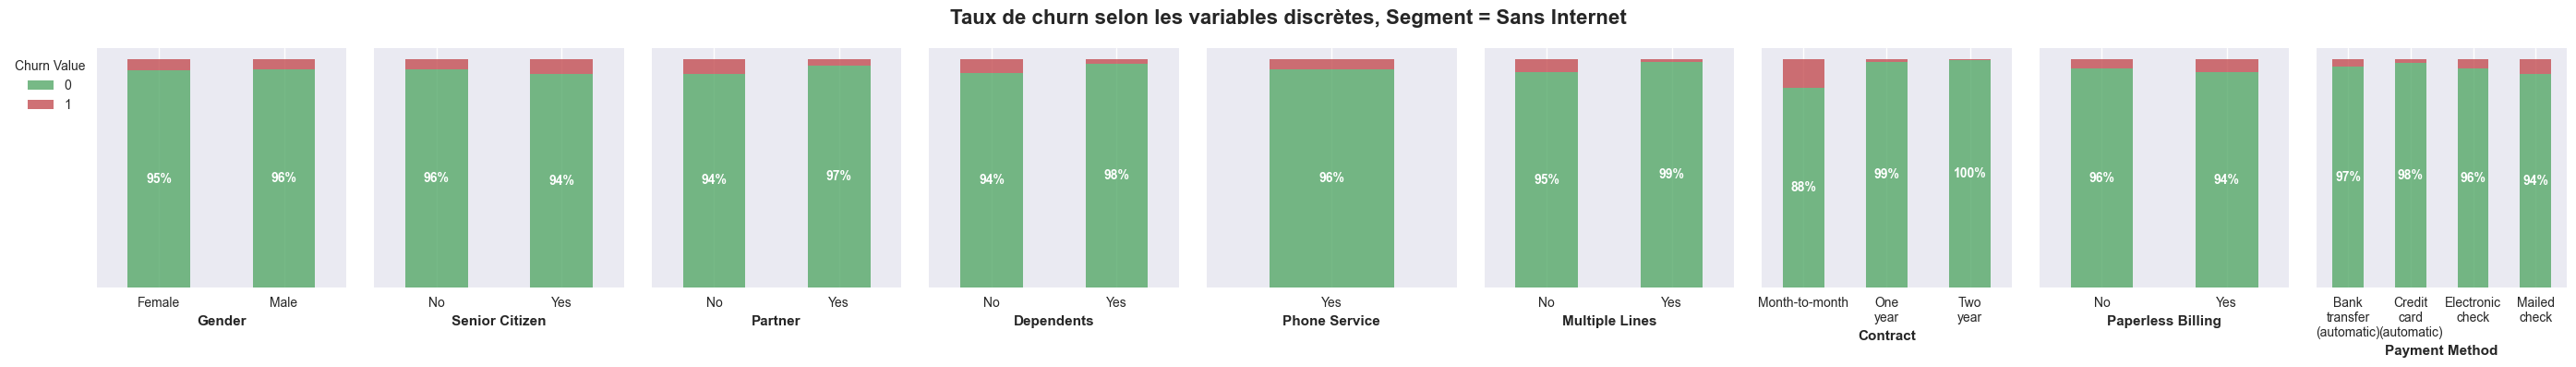

In [20]:
for segment, tmp_df in tmp_dfs.items():
    plot_disc_vs_target(df=tmp_df, cols=disc_no_internet, segment=segment)

In [21]:
print("Taux de churn :")
print(f"- Avec Internet : {df_internet[target].mean():.2%}")
print(f"- Sans Internet : {df_no_internet[target].mean():.2%}")

Taux de churn :
- Avec Internet : 19.94%
- Sans Internet : 4.44%


- Le premier constat est que la taux de churn est globalement plus élevé chez les clients ayant souscrit à des services Internet (20% vs. 4%).
- Pour l'ensemble des clients, nous remarquons que le taux de résiliation est plus élevé lorsque le client :
    - n'a pas de partenaire
    - n'a pas de personnes à charge
    - renouvelle mensuellement son contrat
    - ne possède qu'une seule ligne de téléphone
- Pour les cliens avec Internet, le taux de churn est plus élevé lorsque le client :
    - a plus de 65 ans
    - opte pour une facturation sans papier
    - règle ses factures par chèque électronique
- Pour ceux qui n'utilisent aucun service Internet, le churn est élevé lorsque le client :
    - règle ses factures via un chèque envoyé par courrier
- Ceci nous aide à identifier ces variables comme potentiellement importantes pour notre modèle.

#### **1.1.2. Analyse du lien entre les services Internet et la variable cible**

In [22]:
internet_services = ["Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]

# Nombre de services auxquels le client a souscrit
df_internet["Services Count"] = df_internet[internet_services].replace({"No": "0", "Yes": "1"}).astype(int).sum(axis=1)
internet_services = ["Services Count"] + internet_services

# Test du chi-2 pour juger de l'indépendance entre les variables
for col in internet_services:
    print(f" {col} ".center(25, "-"))
    pvalue = chi2_contingency(pd.crosstab(df_internet[col], df_internet[target])).pvalue
    lien = " *" if pvalue < 0.05 else ""
    print(f"- Internet".ljust(15) + f"  {pvalue:.4f}" + lien)
    print()

----- Services Count ----
- Internet       0.0000 *

---- Online Security ----
- Internet       0.0000 *

----- Online Backup -----
- Internet       0.0000 *

--- Device Protection ---
- Internet       0.0000 *

------ Tech Support -----
- Internet       0.0000 *

------ Streaming TV -----
- Internet       0.0031 *

---- Streaming Movies ---
- Internet       0.1369



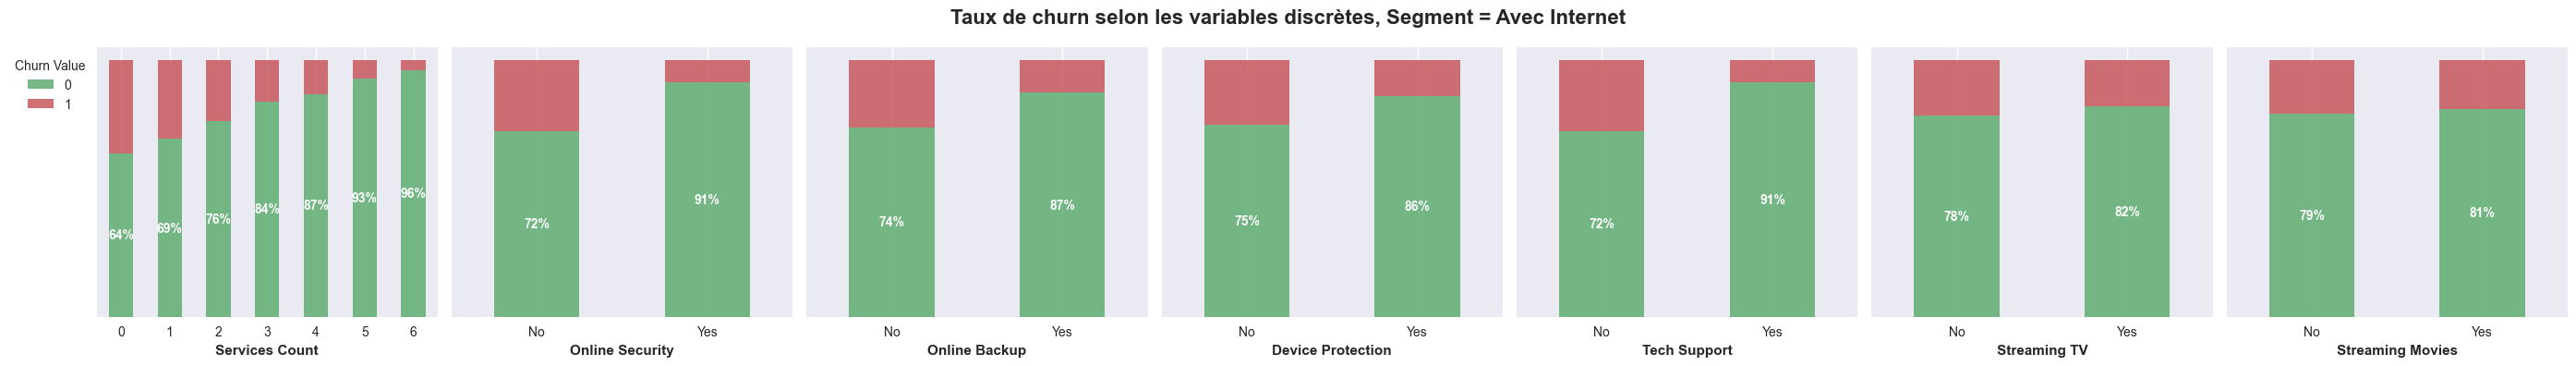

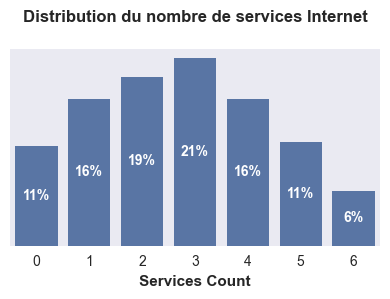

In [23]:
# Graphiques pour une meilleure interprétation des résultats
plot_disc_vs_target(df=df_internet, cols=internet_services, segment="Avec Internet")
plot_disc_variables(df=df_internet, cols=["Services Count"], n_rows=1, n_cols=1, figsize=(4, 3), fig_title="Distribution du nombre de services Internet", fig_title_font_size=12)

- Il semblerait qu'il existe une relation de dépendance entre les différents services Internet et le taux de churn : plus le client souscrit à des options, plus on a de chances qu'il reste.
- Cette tendance est moins marquée pour les services liés au Streaming (TV et films). Sachant d'après le descriptif des données que l'entreprise ne facture pas de frais supplémentaires pour ce service, nous pouvons comprendre pourquoi pris séparément, ces services ne constituent pas un facteur différenciant dans la décion de rester ou de partir.
- Serait-il plus pertinent de ne conserver que le nombre de services consommés (hormis les services de streaming) étant donné la tendance observée ?

### **1.2. Variables continues**

In [24]:
print(f"{len(cont)} variables continues : {cont}")

4 variables continues : ['Monthly Charges', 'Total Charges', 'Tenure Months', 'CLTV']


#### **1.2.1. Avec Internet**

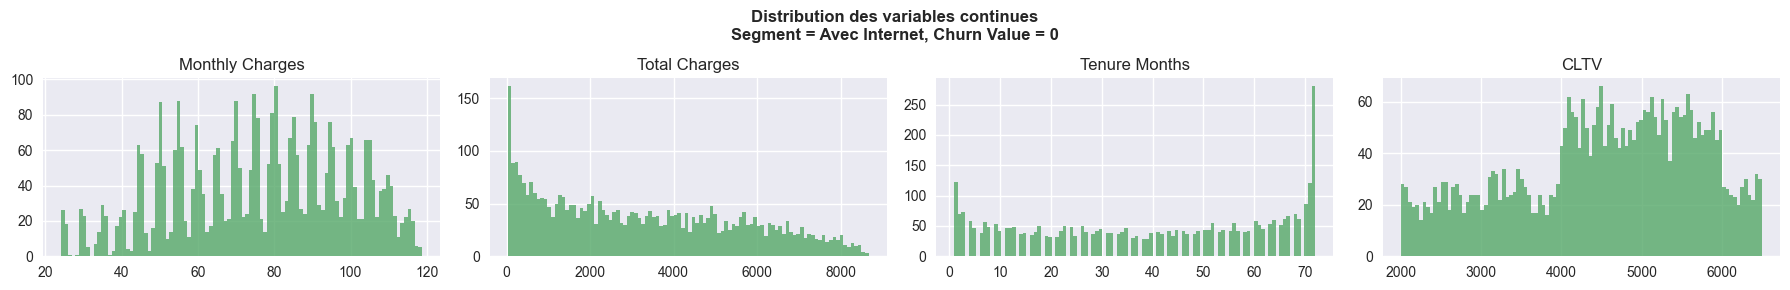

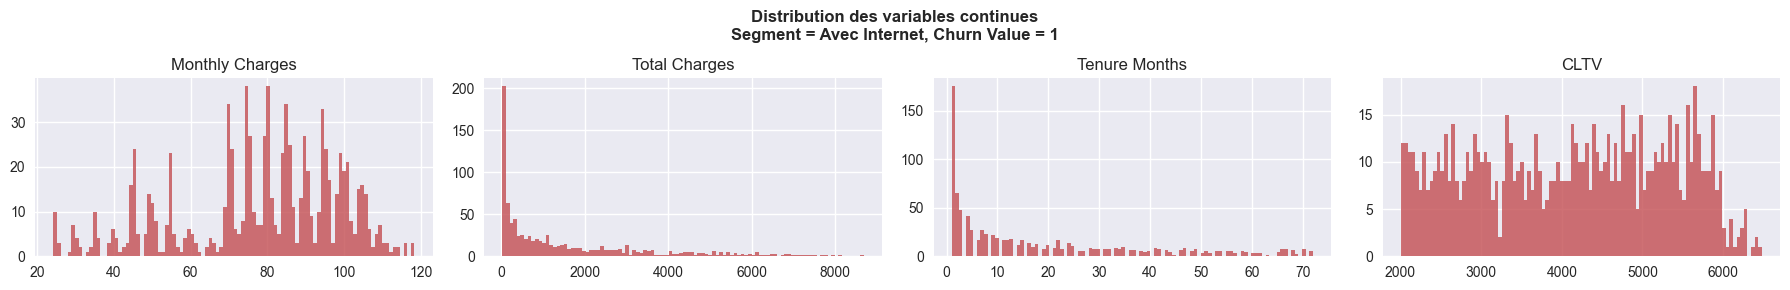

In [25]:
segment = "Avec Internet"
plot_cont_vs_target(df=df_internet, cols=cont, target_value=0, segment=segment)
plot_cont_vs_target(df=df_internet, cols=cont, target_value=1, segment=segment)

- Un nombre important de clients qui partent ont de faibles charges totales.
- Au bout de 70 mois d'ancienneté, il devient très difficile de perdre des clients.
- Les clients qui résilient le font majoritairement dans les premiers mois.
- Les clients ayant une valeur vie > 6 000 ont une faible probabilité de résiliation.

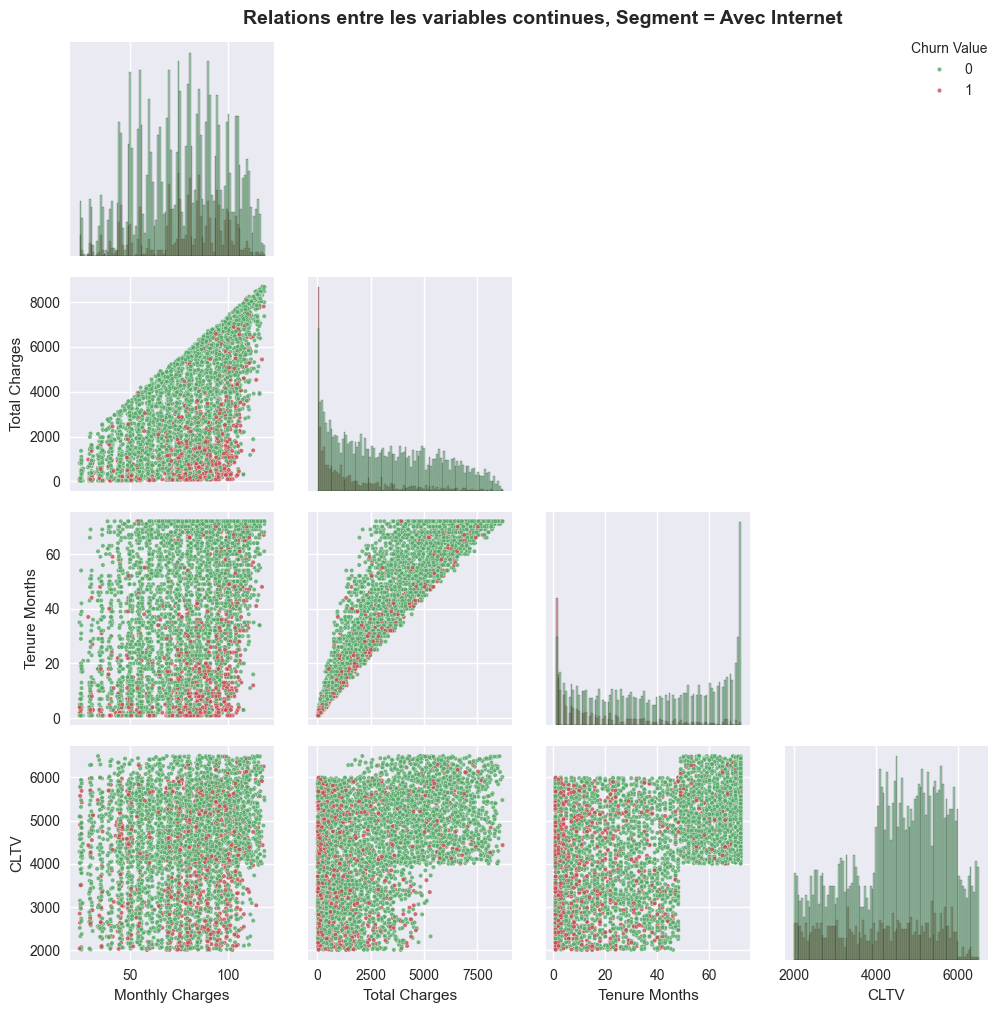

In [26]:
plot_cont_vs_cont(df=df_internet, cols=cont, segment=segment)

- Il semblerait que les clients soient divisées en 2 groupes selon leur ancienneté, cela s'observe notamment sur le nuage de points entre la valeur client et (les charges totales ou l'ancienneté), mais plus précisément avec la dernière.
- Sur ces graphiques on notera `Nouveaux Clients` le segment dont les points se situent en bas à gauche, et `Anciens Clients` celui avec les points en haut à droite.

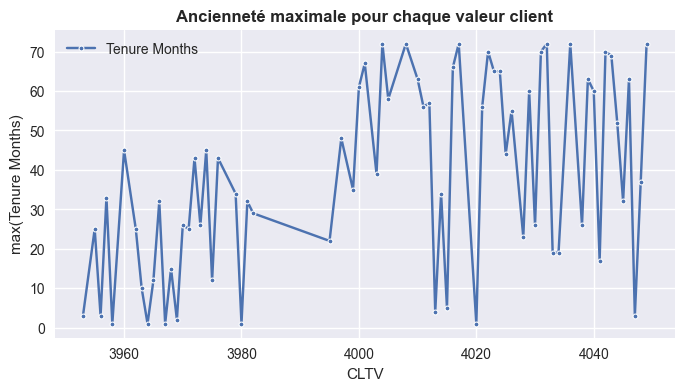

In [27]:
# Déterminons la borne supérieure d'ancienneté pour les nouveaux clients
plt.figure(figsize=(8, 4))
c1, c2 = ["Tenure Months", "CLTV"]

y = df_internet[[c1, c2]].query("(CLTV > 3950) & (CLTV < 4050)").groupby(c2).max(c1)
sns.lineplot(y, marker=".")
plt.ylabel("max(Tenure Months)")
plt.title("Ancienneté maximale pour chaque valeur client", weight="bold")

plt.show()

- On note un passage d'anciennetés maximales toutes inférieures à 50 mois, à une ancienneté maximale supérieure à 60 mois pour une valeur client avoisinnant les 4000.

In [28]:
y[y.index <= 4000].sort_values("Tenure Months", ascending=False)[:2]

,Tenure Months
CLTV,
4000,61
3997,48


- Nous pouvons donc fixer un seuil d'anciennté à 48 mois pour distinguer les anciens clients des nouveaux.

##### **1.2.1.a. Avec Internet, Nouveaux Clients**

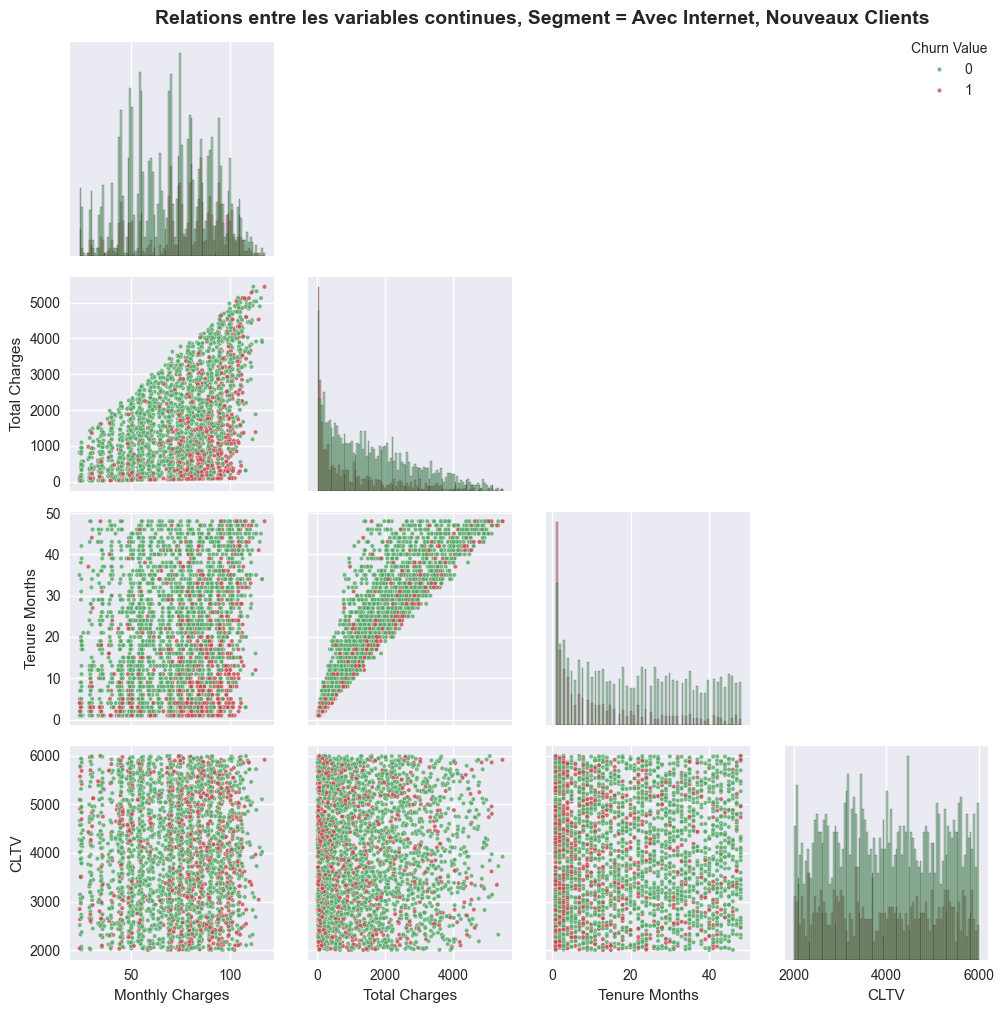

In [29]:
segment = "Avec Internet, Nouveaux Clients"
df_internet_g1 = df_internet.query("`Tenure Months` <= 48").copy()
plot_cont_vs_cont(df=df_internet_g1, cols=cont, segment=segment)

- Ces graphiques nous donnent des raisons de penser qu'une segmentation efficace des clients en fonction du montant de leur facture mensuelle pourrait revéler des tendances intéressantes.
- Afin d'avoir un aperçu visuel des différents intervalles de charges mensuelles, nous allons faire la différence des valeurs uniques et ordonnées de la variable `Monthly Charges`.

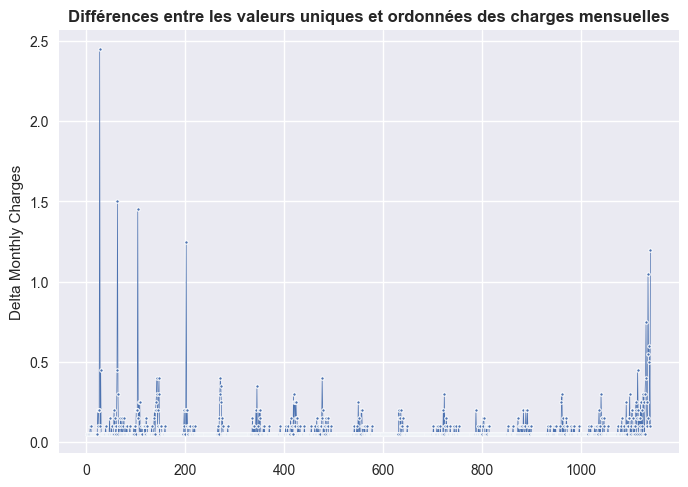

In [30]:
y = df_internet_g1["Monthly Charges"].drop_duplicates().sort_values().diff()
x = np.arange(len(y))

ax = sns.lineplot(x=x, y=y, marker=".", lw=0.5)
plt.setp(ax.lines, markersize=5)
plt.title(f"Différences entre les valeurs uniques et ordonnées des charges mensuelles", weight="bold")
plt.ylabel(f"Delta Monthly Charges")
plt.show()

- Nous détectons une vingtaine de groupes, nous allons utiliser un algorithme de clustering pour les distinguer.

In [31]:
from sklearn.cluster import KMeans

kmeans_internet = KMeans(n_clusters=20, random_state=42)
df_internet_g1["Monthly Charges Cluster"] = kmeans_internet.fit_predict(df_internet_g1[["Monthly Charges"]])

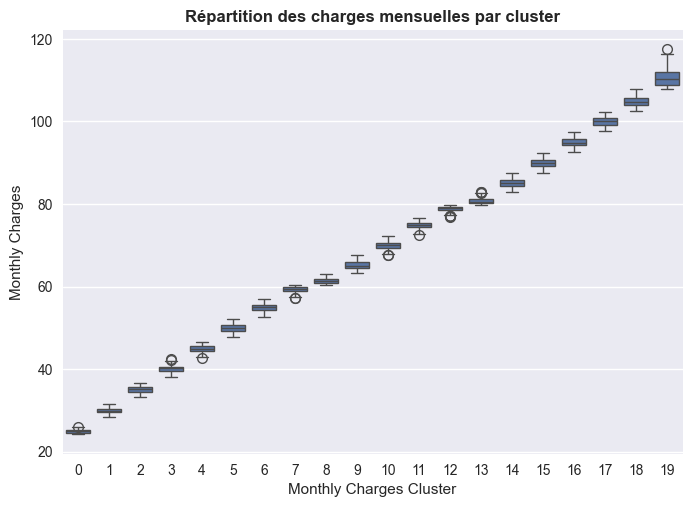

In [32]:
# Les clusters sont rangés selon l'ordre croissant de leurs médianes pour garantir une progression logique
cluster_medians = df_internet_g1.groupby("Monthly Charges Cluster")["Monthly Charges"].median()
sorted_clusters = cluster_medians.sort_values().index 
clusters_mapping_internet = {old: new for new, old in enumerate(sorted_clusters)}
df_internet_g1["Monthly Charges Cluster"] = df_internet_g1["Monthly Charges Cluster"].map(clusters_mapping_internet)

sns.boxplot(df_internet_g1, x="Monthly Charges Cluster", y="Monthly Charges")
plt.title("Répartition des charges mensuelles par cluster", weight="bold")
plt.show()

- Au sein de chaque cluster, on observe une très forte correlation entre les variables `Tenure Months` et `Total Charges` et pourtant d'un point de vue global, le lien n'est pas aussi prononcé.

Corrélation totale : 0.9122
Moyenne des corrélations intra-groupes : 0.9979


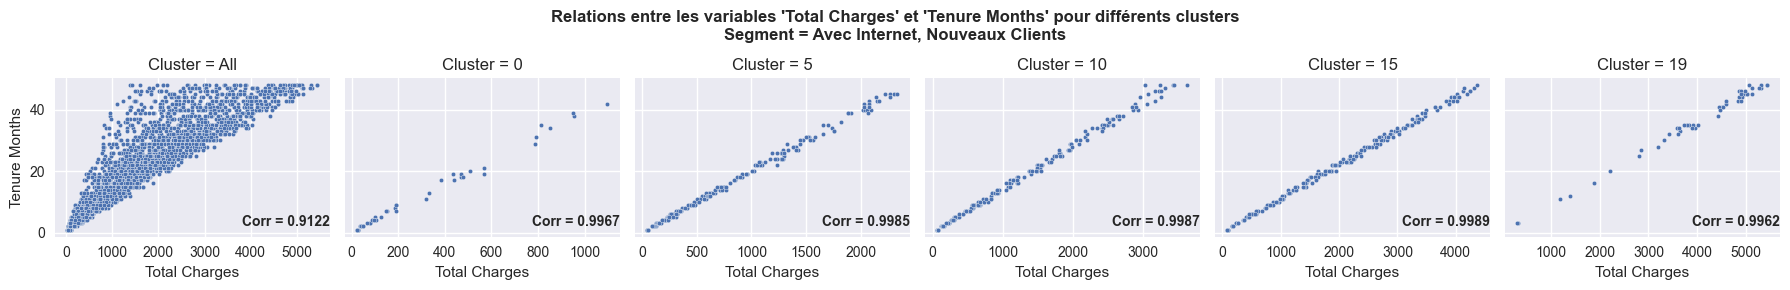

In [33]:
from scipy.stats import pearsonr

c1, c2 = "Total Charges", "Tenure Months"

corr_all = pearsonr(df_internet_g1[c1], df_internet_g1[c2]).statistic
print(f"Corrélation totale : {corr_all:.4f}")

corr_clusters = []
for i in range(20):
    tmp_df = df_internet_g1.query("`Monthly Charges Cluster` == @i")
    corr_clusters.append(pearsonr(tmp_df[c1], tmp_df[c2]).statistic)
    
print(f"Moyenne des corrélations intra-groupes : {np.mean(corr_clusters):.4f}")

# Quelques exemples visuels
_, axes = plt.subplots(1, 6, sharey=True, figsize=(18, 3))

sns.scatterplot(data=df_internet_g1, x=c1, y=c2, s=10, ax=axes[0])
axes[0].text(axes[0].get_xlim()[1], 2, f"Corr = {corr_all:.4f}", ha="right", weight="bold")
axes[0].set_title(f"Cluster = All")

for _, i in enumerate([0, 5, 10, 15, 19]):
    ax = axes[_ + 1]
    
    tmp_df = df_internet_g1.query("`Monthly Charges Cluster` == @i")

    sns.scatterplot(data=tmp_df, x=c1, y=c2, s=10, ax=ax)
    ax.text(ax.get_xlim()[1], 2, f"Corr = {corr_clusters[i]:.4f}", ha="right", weight="bold")
    ax.set_title(f"Cluster = {i}")
    
plt.suptitle(f"Relations entre les variables '{c1}' et '{c2}' pour différents clusters\nSegment = {segment}", y=0.95, weight="bold")
plt.tight_layout()
plt.show()

- Pour la modélisation, nous allons discrétiser la variable `Monthly Charges` selon les clusters calculés précédemment, et supprimer `Total Charges` pour éviter la redondance dans les données. Nous conserverons donc `Tenure Months` que nous pourrons par ailleurs séparer suivant les 2 groupes observés (ancienneté <= et > 48 mois).
- Vérifions la pertinence de ces actions sur les anciens clients.

##### **1.2.1.b. Avec Internet, Anciens Clients**

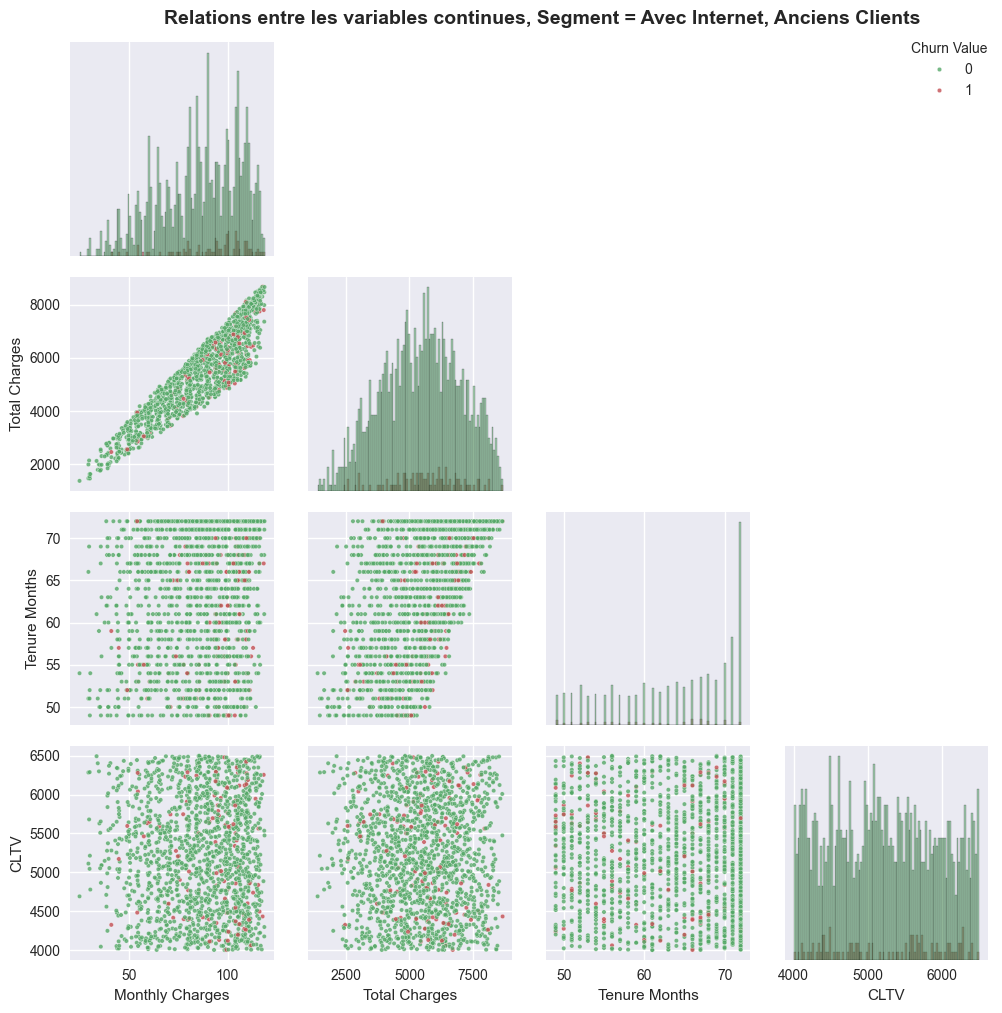

In [34]:
segment = "Avec Internet, Anciens Clients"
df_internet_g2 = df_internet.drop(df_internet_g1.index).copy()
plot_cont_vs_cont(df=df_internet_g2, cols=cont, segment=segment)

In [35]:
df_internet_g2["Monthly Charges Cluster"] = kmeans_internet.predict(df_internet_g2[["Monthly Charges"]])
df_internet_g2["Monthly Charges Cluster"] = df_internet_g2["Monthly Charges Cluster"].map(clusters_mapping_internet)

In [36]:
c1, c2 = "Total Charges", "Tenure Months"

corr_all = pearsonr(df_internet_g2[c1], df_internet_g2[c2]).statistic
print(f"Corrélation totale : {corr_all:.4f}")

corr_clusters = []
for i in range(20):
    tmp_df = df_internet_g2.query("`Monthly Charges Cluster` == @i")
    
    if len(tmp_df) > 2:
        corr_clusters.append(pearsonr(tmp_df[c1], tmp_df[c2]).statistic)
    
print(f"Moyenne des corrélations intra-groupes : {np.mean(corr_clusters):.4f}")

Corrélation totale : 0.5663
Moyenne des corrélations intra-groupes : 0.9749


- En appliquant le même processus de discrétisation de la variable `Monthly Charges`, on observe la même augmentation de la corrélation intra-groupes entre l'ancienneté du client et ses charges totales.

#### **1.2.2. Sans Internet**

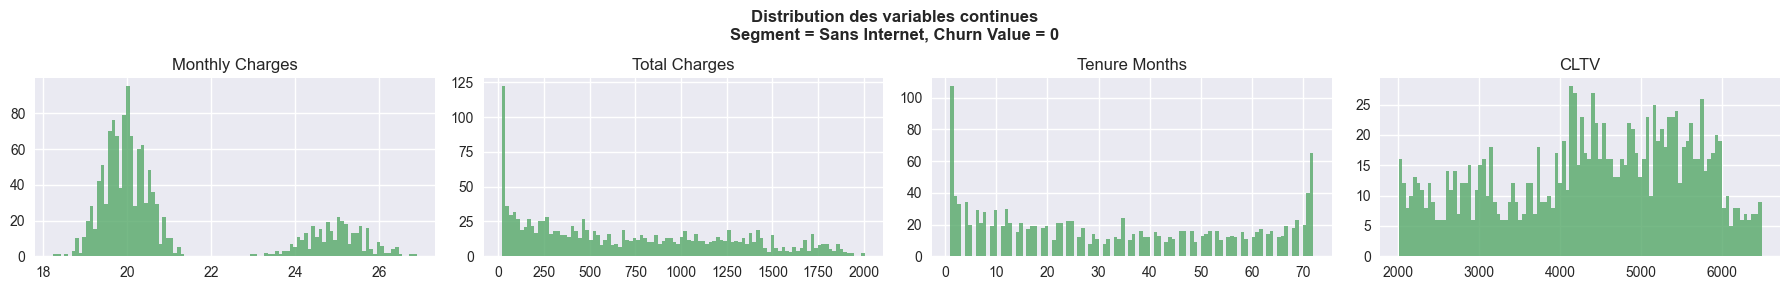

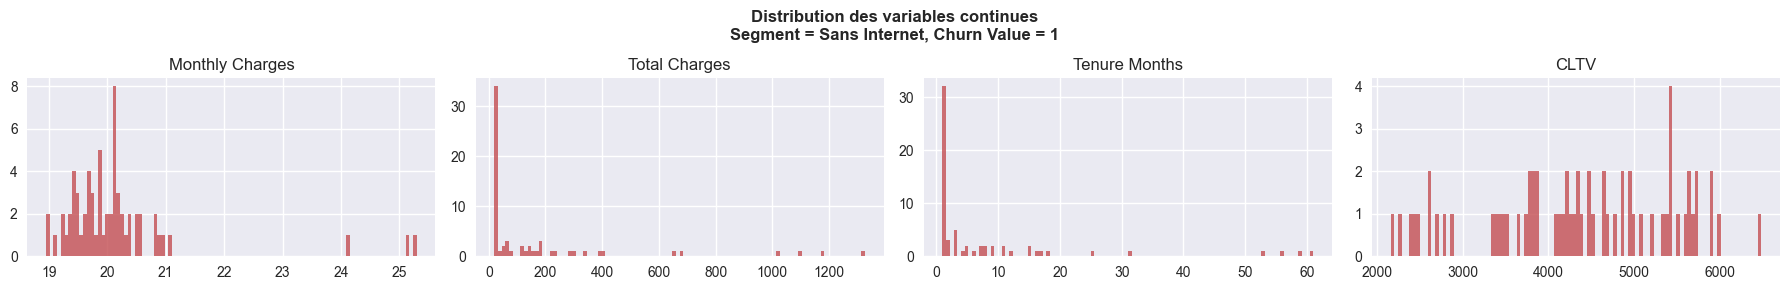

In [37]:
segment = "Sans Internet"
plot_cont_vs_target(df=df_no_internet, cols=cont, target_value=0, segment=segment)
plot_cont_vs_target(df=df_no_internet, cols=cont, target_value=1, segment=segment)

- On note une séparation nette des données en 2 classes suivant le montant des charges mensuelles, avec un très faible taux de churn chez les clients qui ayant plus de 22$ de charges mensuelles.

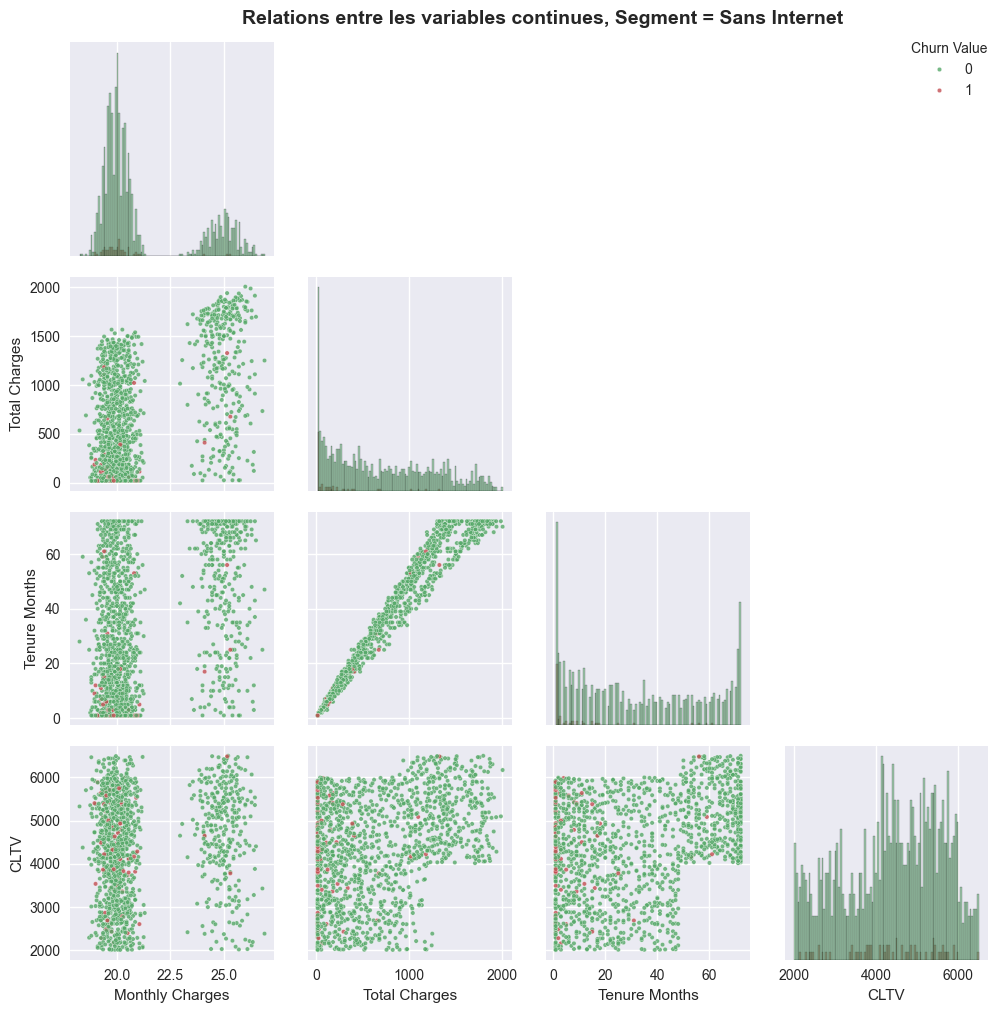

In [38]:
plot_cont_vs_cont(df=df_no_internet, cols=cont, segment=segment)

- On remarque à nouveau la corrélation évidente entre l'ancienneté et le montant des charges totales (potentiellement renforcée par une segmentation des charges mensuelles comme vu précédemment, mais cette fois-ci en 2 classes).
- Les anciens et nouveaux clients sont également visibles.

In [39]:
kmeans_no_internet = KMeans(n_clusters=2, random_state=42)
df_no_internet["Monthly Charges Cluster"] = kmeans_no_internet.fit_predict(df_no_internet[["Monthly Charges"]])

# Les clusters sont rangés selon l'ordre croissant de leurs médianes pour garantir une progression logique
cluster_medians = df_no_internet.groupby("Monthly Charges Cluster")["Monthly Charges"].median()
sorted_clusters = cluster_medians.sort_values().index
clusters_mapping_no_internet = {old: new for new, old in enumerate(sorted_clusters)}
df_no_internet["Monthly Charges Cluster"] = df_no_internet["Monthly Charges Cluster"].map(clusters_mapping_no_internet)

#### **1.2.3. Coordonnées géographiques**

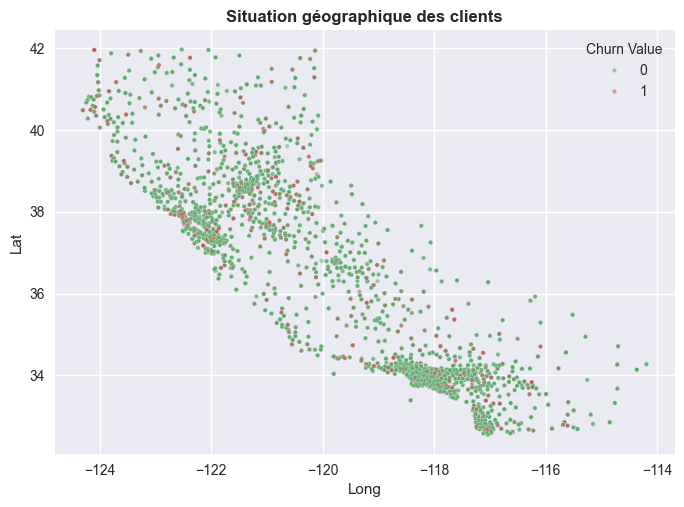

In [40]:
sns.scatterplot(df, x="Long", y="Lat", hue=target, s=10, alpha=0.5, palette=sns.color_palette()[1:3])
plt.title("Situation géographique des clients", weight="bold")
plt.show()

- Aucune observation particulière ne se dégage de cette figure.

## **2. Préparation des données**

In [41]:
# Chargement
df = pd.read_csv("DatasetChurn.csv")

# Suppression des valeurs manquantes
df.dropna(inplace=True)

# Extraction de la latitude et de la longitude
df["Lat"] = df["Lat Long"].str.split(", ").str[0].astype(float)
df["Long"] = df["Lat Long"].str.split(", ").str[1].astype(float)

# Identification des nouveaux clients
df["Is New Client"] = (df["Tenure Months"] <= 48).astype(int)

# Séparation avec/sans Internet
df_internet = df.query("`Internet Service` != 'No'").copy()
df_no_internet = df.drop(df_internet.index).copy()

### **2.1 Avec Internet**

In [42]:
from sklearn.cluster import KMeans

In [43]:
# Création des clusters de `Monthly Charges`, puis réorganisation des labels
# selon l'ordre croissant de leurs médianes pour garantir une progression logique
kmeans_internet = KMeans(n_clusters=20, random_state=42)
df_internet["Monthly Charges Group"] = kmeans_internet.fit_predict(df_internet[["Monthly Charges"]])

cluster_medians = df_internet.groupby("Monthly Charges Group")["Monthly Charges"].median()
sorted_clusters = cluster_medians.sort_values().index 
clusters_mapping_internet = {old: new for new, old in enumerate(sorted_clusters)}
df_internet["Monthly Charges Group"] = df_internet["Monthly Charges Group"].map(clusters_mapping_internet)

# Ajout de la colonne `Services Count` pour compter le nombre de services auxquels le client a souscrit
internet_services = ["Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]
df_internet["Services Count"] = df_internet[internet_services].replace({"No": "0", "Yes": "1"}).astype(int).sum(axis=1)

# Vision d'ensemble
df_internet.nunique()

CustomerID               4569
Zip Code                 1638
Lat Long                 1638
Gender                      2
Senior Citizen              2
Partner                     2
Dependents                  2
Tenure Months              72
Phone Service               2
Multiple Lines              3
Internet Service            2
Online Security             2
Online Backup               2
Device Protection           2
Tech Support                2
Streaming TV                2
Streaming Movies            2
Contract                    3
Paperless Billing           2
Payment Method              4
Monthly Charges          1427
Total Charges            4435
Churn Value                 2
CLTV                     2798
Lat                      1638
Long                     1637
Is New Client               2
Monthly Charges Group      20
Services Count              7
dtype: int64

### **2.2. Sans Internet**

In [44]:
# Création des clusters de `Monthly Charges`, puis réorganisation des labels
# selon l'ordre croissant de leurs médianes pour garantir une progression logique
kmeans_no_internet = KMeans(n_clusters=2, random_state=42)
df_no_internet["Monthly Charges Group"] = kmeans_no_internet.fit_predict(df_no_internet[["Monthly Charges"]])

cluster_medians = df_no_internet.groupby("Monthly Charges Group")["Monthly Charges"].median()
sorted_clusters = cluster_medians.sort_values().index 
clusters_mapping_no_internet = {old: new for new, old in enumerate(sorted_clusters)}
df_no_internet["Monthly Charges Group"] = df_no_internet["Monthly Charges Group"].map(clusters_mapping_no_internet)

# Vision d'ensemble
df_no_internet.nunique()

CustomerID               1442
Zip Code                 1038
Lat Long                 1038
Gender                      2
Senior Citizen              2
Partner                     2
Dependents                  2
Tenure Months              72
Phone Service               1
Multiple Lines              2
Internet Service            1
Online Security             1
Online Backup               1
Device Protection           1
Tech Support                1
Streaming TV                1
Streaming Movies            1
Contract                    3
Paperless Billing           2
Payment Method              4
Monthly Charges           121
Total Charges            1332
Churn Value                 2
CLTV                     1218
Lat                      1038
Long                     1038
Is New Client               2
Monthly Charges Group       2
dtype: int64

## **3. Model**

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

### **3.1. Avec Internet**

- Nous entraînons d'abord un modèle de régression logistique en testant diverses combinaisons de variables.
- La métrique d'intérêt est le rappel; plus il sera élevé et plus on aura de chances d'anticiper les résiliations.

In [46]:
disc = [
    "Gender",
    "Senior Citizen",
    "Partner",
    "Dependents",
    "Phone Service",
    "Multiple Lines",
    "Internet Service",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Contract",
    "Paperless Billing",
    "Payment Method",
    "Is New Client",
]
cont = [
    "Tenure Months",
    "Monthly Charges",
    "Total Charges",
    # "CLTV",
    # "Lat",
    "Long",
    # "Monthly Charges Group",
    # "Services Count",

]

X_internet = df_internet.drop(columns="Churn Value")
y_internet = df_internet["Churn Value"]
X_train_internet, X_test_internet, y_train_internet, y_test_internet = train_test_split(X_internet, y_internet, test_size=0.2, random_state=42, stratify=y_internet)

preprocessor_internet = ColumnTransformer(
    transformers=[
        ("disc", OneHotEncoder(drop="first", handle_unknown="ignore"), disc),
        ("cont", MinMaxScaler(), cont),
    ],
    remainder="drop",
)

X_train_internet_preprocessed = preprocessor_internet.fit_transform(X_train_internet)

clf_internet = LogisticRegression(random_state=42)
print(f"LogisticRegression : {cross_val_score(clf_internet, X_train_internet_preprocessed, y_train_internet, scoring='recall', cv=5).mean():.4f}")

LogisticRegression : 0.3703


- En utilisant toutes les variables, le rappel est de : 0.3594.
- A la suite de tests manuels, on obtient les meilleures performances en supprimant la valeur client et la latitude du modèle, ainsi que 2 des 3 variables que nous avons créé (les clusters de charges mensuelles et le nombre de services Internet).
- Avec cette configuration, la suppression de `Is New Client` entraîne une baisse de la performance (0.3539).
- `Dependants`, `Tenure Months` sont également des variables très importantes pour la détection du churn; leur suppression entraîne une baisse considérable du rappel.
- Le modèle de régression logistique est un modèle assez simple qui a servi pour un premier benchmark, mais nous pensons qu'un modèle de type gradient boosting pourrait être mieux ajusté pour augmenter significativement le score.

In [47]:
clf_internet = XGBClassifier(random_state=42)
print(f"XGBClassifier : {cross_val_score(clf_internet, X_train_internet_preprocessed, y_train_internet, scoring='recall', cv=5).mean():.4f}")

XGBClassifier : 0.3896


- Nous effectuons une recherche d'hyperparamètres avec validation-croisée à l'aide d'un `GridSearchCV`.

In [48]:
param_grid_internet = {
    "scale_pos_weight": np.arange(2, 10, 1),  # poids associé aux points positifs (minoritaires)
    "learning_rate": np.arange(0.01, 0.31, 0.02),  # taux d'apprentissage
    "subsample": [0.9, 1.0],  # proportion des lignes sélectionnées
}

model_internet = GridSearchCV(clf_internet, param_grid_internet, scoring="f1", cv=5)
model_internet.fit(X_train_internet_preprocessed, y_train_internet)

print("Paramètres :", model_internet.best_params_)
print("Score (rappel) :", model_internet.best_score_)

Paramètres : {'learning_rate': np.float64(0.03), 'scale_pos_weight': np.int64(3), 'subsample': 1.0}
Score (rappel) : 0.5635405248221012


### **3.2. Sans Internet**

In [49]:
disc = [
    "Gender",
    "Senior Citizen",
    "Partner",
    # "Dependents",
    "Multiple Lines",
    "Contract",
    "Paperless Billing",
    "Payment Method",
    "Is New Client",
]
cont = [
    "Tenure Months",
    "Monthly Charges",
    "Total Charges",
    "CLTV",    
    "Lat",    
    # "Long",
    "Monthly Charges Group",
]

X_no_internet = df_no_internet.drop(columns="Churn Value")
y_no_internet = df_no_internet["Churn Value"]
X_train_no_internet, X_test_no_internet, y_train_no_internet, y_test_no_internet = train_test_split(X_no_internet, y_no_internet, test_size=0.2, random_state=42, stratify=y_no_internet)

preprocessor_no_internet = ColumnTransformer(
    transformers=[
        ("disc", OneHotEncoder(drop="first", handle_unknown="ignore"), disc),
        ("cont", MinMaxScaler(), cont),
    ],
    remainder="drop",
)

X_train_no_internet_preprocessed = preprocessor_no_internet.fit_transform(X_train_no_internet)

clf_no_internet = XGBClassifier(random_state=42)
print(f"XGBClassifier : {cross_val_score(clf_no_internet, X_train_no_internet_preprocessed, y_train_no_internet, scoring='recall', cv=5).mean():.4f}")

XGBClassifier : 0.1782


In [50]:
param_grid_no_internet = {
    "scale_pos_weight": np.arange(2, 10, 1),  # poids associé aux points positifs (minoritaires)
    "learning_rate": np.arange(0.01, 0.31, 0.02),  # taux d'apprentissage
    "subsample": [0.9, 1.0],  # proportion des lignes sélectionnées
}

model_no_internet = GridSearchCV(clf_no_internet, param_grid_no_internet, scoring="f1", cv=5)
model_no_internet.fit(X_train_no_internet_preprocessed, y_train_no_internet)

print("Paramètres :", model_no_internet.best_params_)
print("Score (rappel) :", model_no_internet.best_score_)

Paramètres : {'learning_rate': np.float64(0.10999999999999997), 'scale_pos_weight': np.int64(9), 'subsample': 1.0}
Score (rappel) : 0.25695450748082327


In [51]:
np.arange(0.01, 0.31, 0.02)

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29])

### **3.3. Performances globabes**

In [52]:
# Evaluation sur le test set (Internet)
X_test_internet_preprocessed = preprocessor_internet.transform(X_test_internet)
y_pred_internet = model_internet.predict(X_test_internet_preprocessed)
print(classification_report(y_true=y_test_internet, y_pred=y_pred_internet))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       732
           1       0.50      0.69      0.58       182

    accuracy                           0.80       914
   macro avg       0.71      0.76      0.72       914
weighted avg       0.83      0.80      0.81       914



- Notre modèle à une accuracy à 74%, une faible précision à 41% et un rappel à 80%.
- Cela signifie que nous pourrons anticiper 4 départs sur 5, mais également que 3 fois sur 5, nous aurons à faire à des fausses alertes.
- Dans un contexte réel, les politiques de rétention client impliquant des coûts, nous pourrons, après concertation avec les équipes métier, ajuster le seuil de décision afin de trouver le meilleur compromis entre la réduction des fausses alertes et l'efficacité de la prédiction des résiliations.
- Il est également possible d'adopter une stratégie différente selon les probabilités prédites et d'autres critères importants tels que la valeur client, l'ancienneté, etc.

In [53]:
# Evaluation sur le test set (No Internet)
X_test_no_internet_preprocessed = preprocessor_no_internet.transform(X_test_no_internet)
y_pred_no_internet = model_no_internet.predict(X_test_no_internet_preprocessed)
print(classification_report(y_true=y_test_no_internet, y_pred=y_pred_no_internet))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       276
           1       0.17      0.15      0.16        13

    accuracy                           0.93       289
   macro avg       0.56      0.56      0.56       289
weighted avg       0.92      0.93      0.93       289



In [54]:
# Evaluation sur le test set (All)
y_true = pd.concat([y_test_internet, y_test_no_internet])
y_pred = np.concat([y_pred_internet, y_pred_no_internet])
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1008
           1       0.48      0.66      0.56       195

    accuracy                           0.83      1203
   macro avg       0.71      0.76      0.73      1203
weighted avg       0.86      0.83      0.84      1203



### **3.4. Et si on avait entraîné qu'un seul modèle ?**

In [55]:
X_train_all = pd.concat([X_train_internet, X_train_no_internet])
y_train_all = pd.concat([y_train_internet, y_train_no_internet])

In [56]:
disc = [
    "Gender",
    "Senior Citizen",
    "Partner",
    "Dependents",
    "Phone Service",
    "Multiple Lines",
    "Internet Service",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Contract",
    "Paperless Billing",
    "Payment Method",
    "Is New Client",
]
cont = [
    "Tenure Months",
    "Monthly Charges",
    "Total Charges",
    
    # "CLTV",
    # "Lat",
    
    "Long",
    
    "Monthly Charges Group",
    "Services Count",

]


X_train_all = pd.concat([X_train_internet, X_train_no_internet]).fillna(0)  # remplacer les na de `Services Count` par 0 dans df_no_inter
X_test_all = pd.concat([X_test_internet, X_test_no_internet])
y_train_all = pd.concat([y_train_internet, y_train_no_internet])
y_test_all = pd.concat([y_test_internet, y_test_no_internet])

preprocessor_all = ColumnTransformer(
    transformers=[
        ("disc", OneHotEncoder(drop="first", handle_unknown="ignore"), disc),
        ("cont", MinMaxScaler(), cont),
    ],
    remainder="drop",
)

X_train_all_preprocessed = preprocessor_all.fit_transform(X_train_all)

clf_all = XGBClassifier(random_state=42)
print(f"XGBClassifier : {cross_val_score(clf_all, X_train_all_preprocessed, y_train_all, scoring='recall', cv=5).mean():.4f}")

XGBClassifier : 0.3603


In [57]:
param_grid_all = {
    "scale_pos_weight": np.arange(2, 10, 1),  # poids associé aux points positifs (minoritaires)
    "learning_rate": np.arange(0.01, 0.31, 0.02),  # taux d'apprentissage
    "subsample": [0.9, 1.0],  # proportion des lignes sélectionnées
}

model_all = GridSearchCV(clf_all, param_grid_all, scoring="f1", cv=5)
model_all.fit(X_train_all_preprocessed, y_train_all)

print("Paramètres :", model_all.best_params_)
print("Score (rappel) :", model_all.best_score_)

Paramètres : {'learning_rate': np.float64(0.03), 'scale_pos_weight': np.int64(4), 'subsample': 0.9}
Score (rappel) : 0.54047897197732


In [58]:
# Evaluation sur le test set (All)
X_test_all_preprocessed = preprocessor_all.transform(X_test_all)
y_pred_all = model_all.predict(X_test_all_preprocessed)
print(classification_report(y_true=y_test_all, y_pred=y_pred_all))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1008
           1       0.43      0.71      0.53       195

    accuracy                           0.80      1203
   macro avg       0.68      0.76      0.70      1203
weighted avg       0.85      0.80      0.82      1203

